## About Dataset

| **Feature**                                | **Explanation**                                                                                                                                                                                                                                  |
| ------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **`SeriousDlqin2yrs`** *(Target Variable)* | Indicates whether the person has experienced **90+ days of delinquency** (non-payment) on any credit obligation in the past 2 years. Value is `1` (Yes) or `0` (No). This is the target to predict.                                              |
| **`RevolvingUtilizationOfUnsecuredLines`** | Represents the **ratio of total credit card balances to total credit limits** (excluding real estate and installment loans). A higher value (>1) means the person is over-utilizing unsecured credit lines, which may indicate financial stress. |
| **`age`**                                  | The **age of the borrower** in years. Very young or very old borrowers may have different risk profiles. For example, young borrowers may lack a credit history.                                                                                 |
| **`NumberOfTime30-59DaysPastDueNotWorse`** | The number of times the borrower has been **30–59 days late on a payment** (but not more severely delinquent) in the last 2 years. Higher values reflect potential instability.                                                                  |
| **`DebtRatio`**                            | The ratio of **monthly debt obligations** (loans, alimony, bills) to **monthly gross income**. A higher ratio means more debt relative to income — often a red flag.                                                                             |
| **`MonthlyIncome`**                        | The borrower’s **gross monthly income**. Lower income levels may indicate less repayment capacity, especially if debt levels are high.                                                                                                           |
| **`NumberOfOpenCreditLinesAndLoans`**      | The total number of **open credit accounts**, including credit cards and loans. A moderate number may indicate healthy credit usage; too many may be risky.                                                                                      |
| **`NumberOfTimes90DaysLate`**              | The number of times the borrower has been **90+ days late** on any payment. This is a **major risk indicator** for default.                                                                                                                      |
| **`NumberRealEstateLoansOrLines`**         | The number of **mortgage-related loans**, such as home loans or home equity credit lines. Indicates real estate exposure. Too many may indicate over-leverage.                                                                                   |
| **`NumberOfTime60-89DaysPastDueNotWorse`** | Number of times the borrower was **60–89 days late** (but not 90+ days) in the last 2 years. Moderate-level delinquency, also a strong risk factor.                                                                                              |
| **`NumberOfDependents`**                   | The number of **financial dependents** (excluding the borrower). More dependents may imply higher expenses, potentially impacting repayment ability.                                                                                             |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import pickle

In [25]:
df = pd.read_csv(r"Input/training data.csv")

In [26]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [27]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [28]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [29]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [32]:
df.dropna(subset="MonthlyIncome", inplace=True)

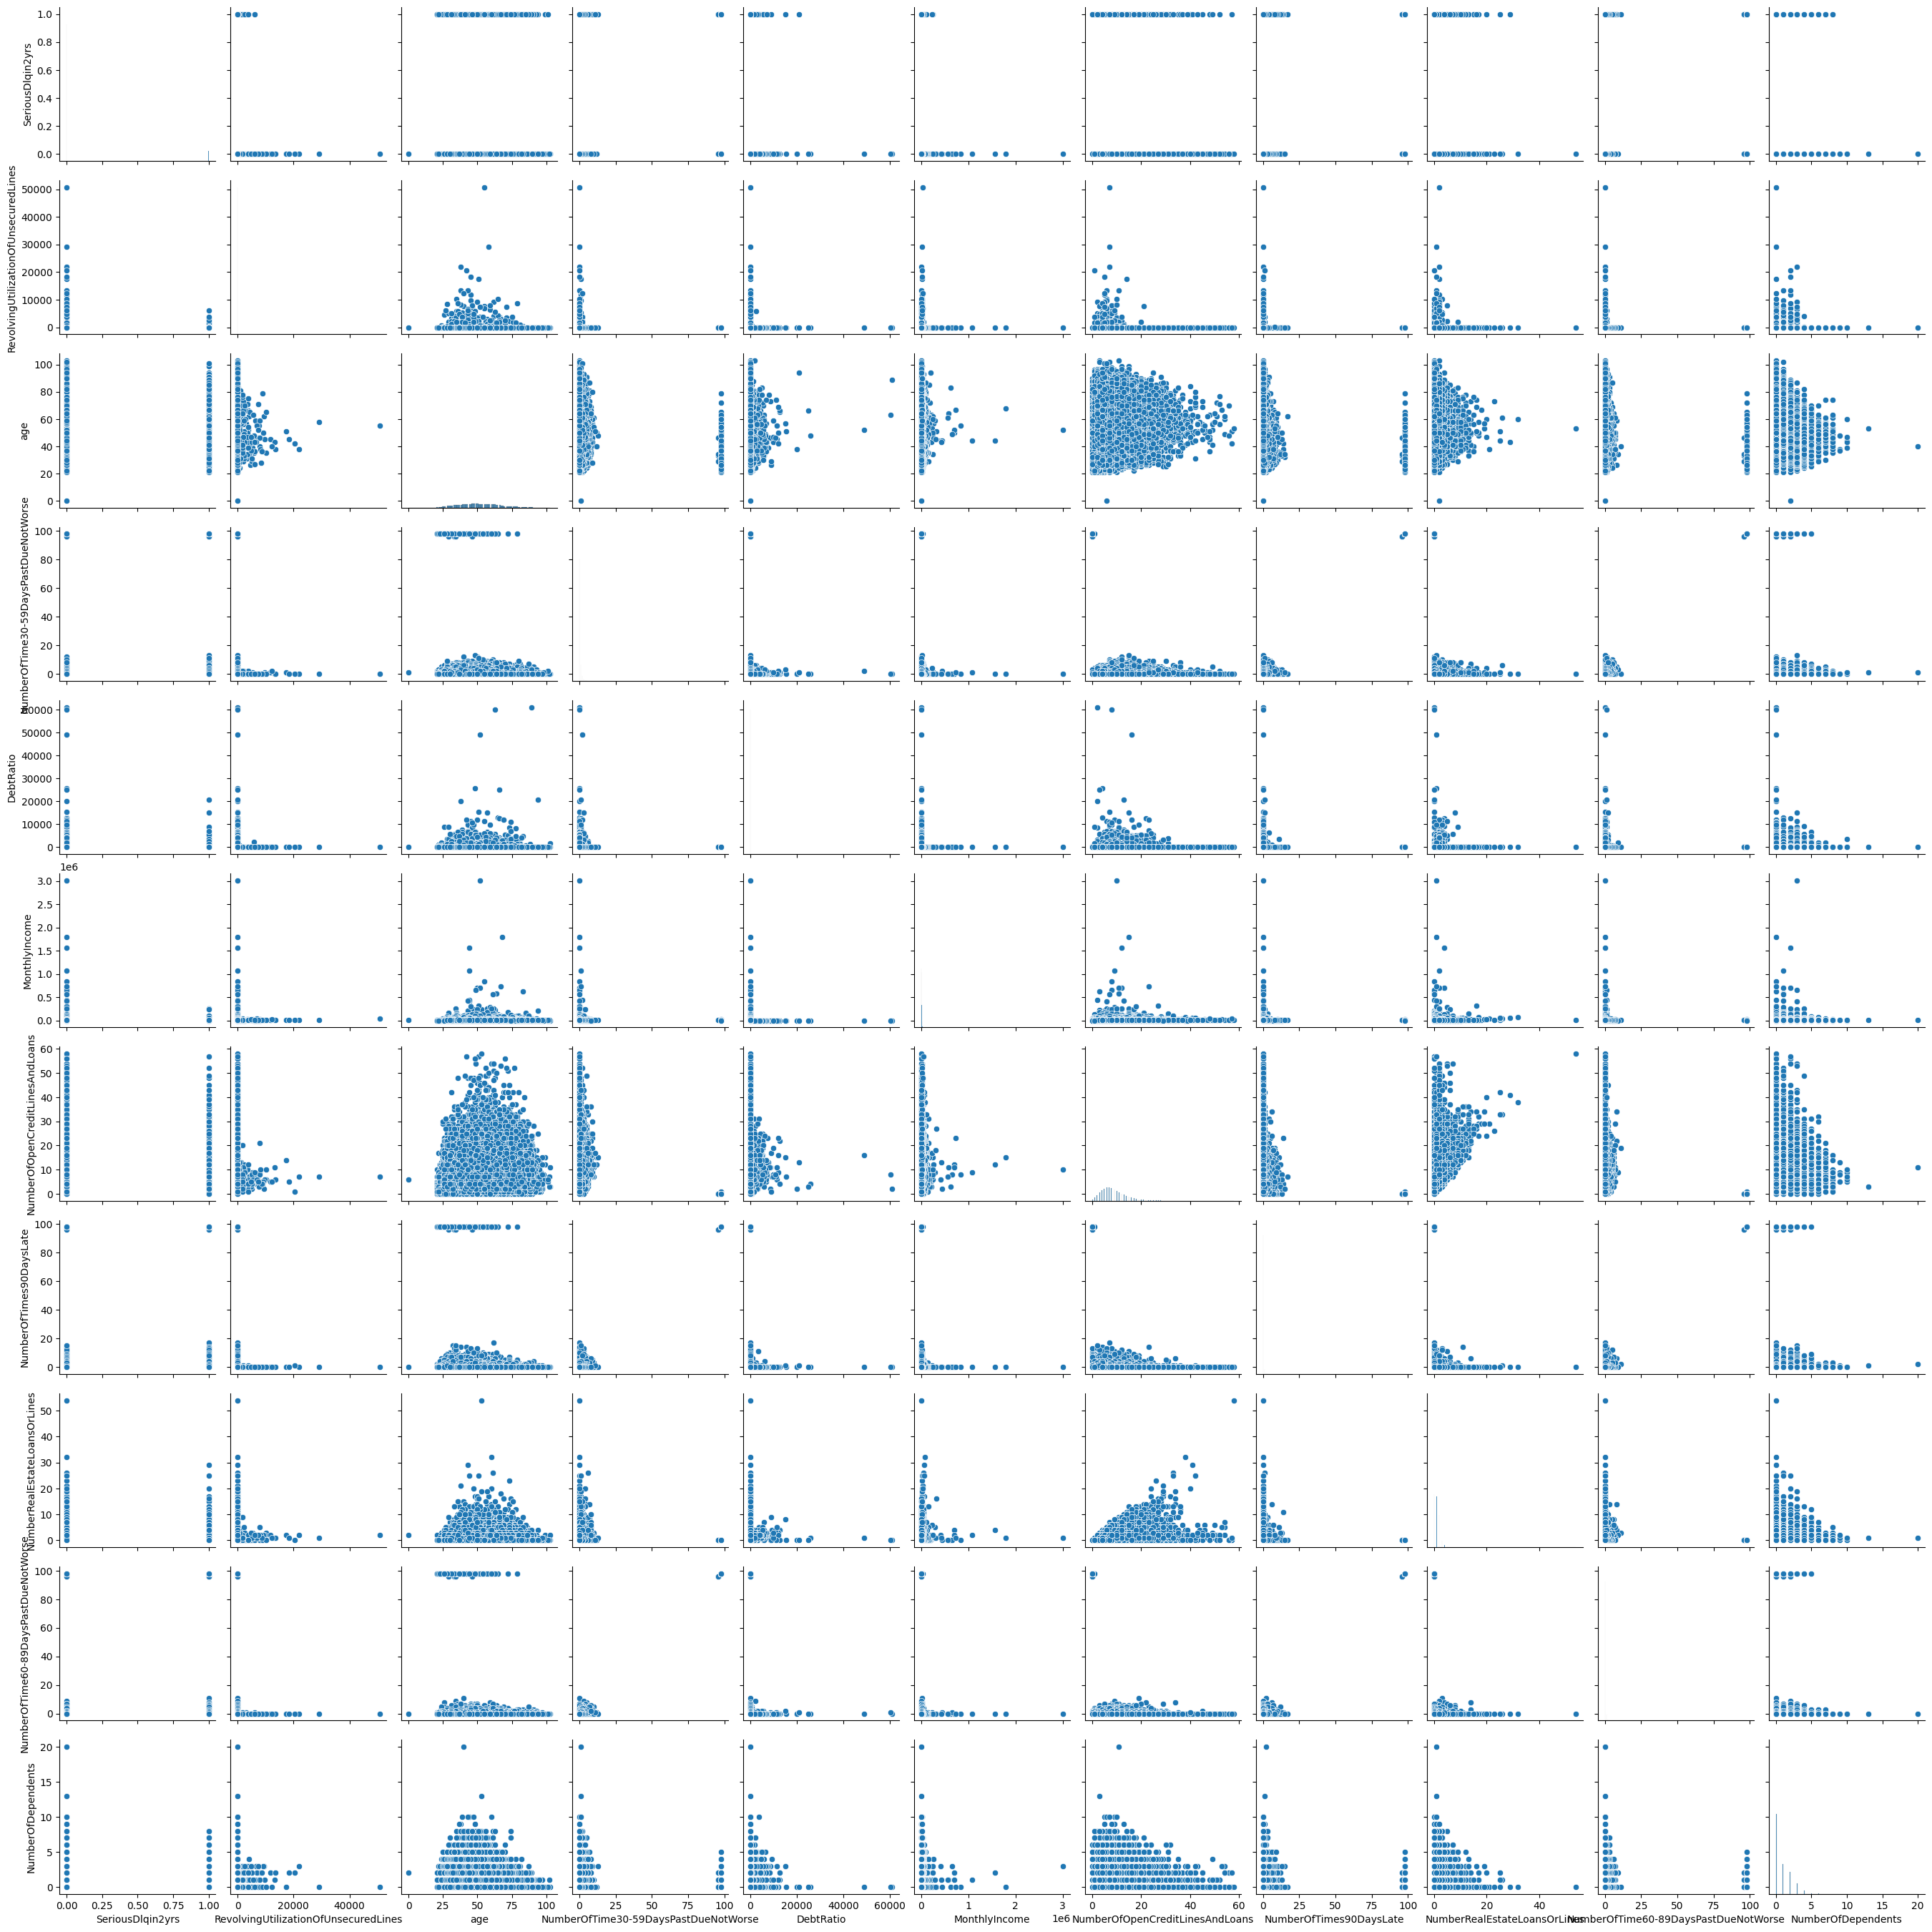

In [33]:
sns.pairplot(df)
plt.show()

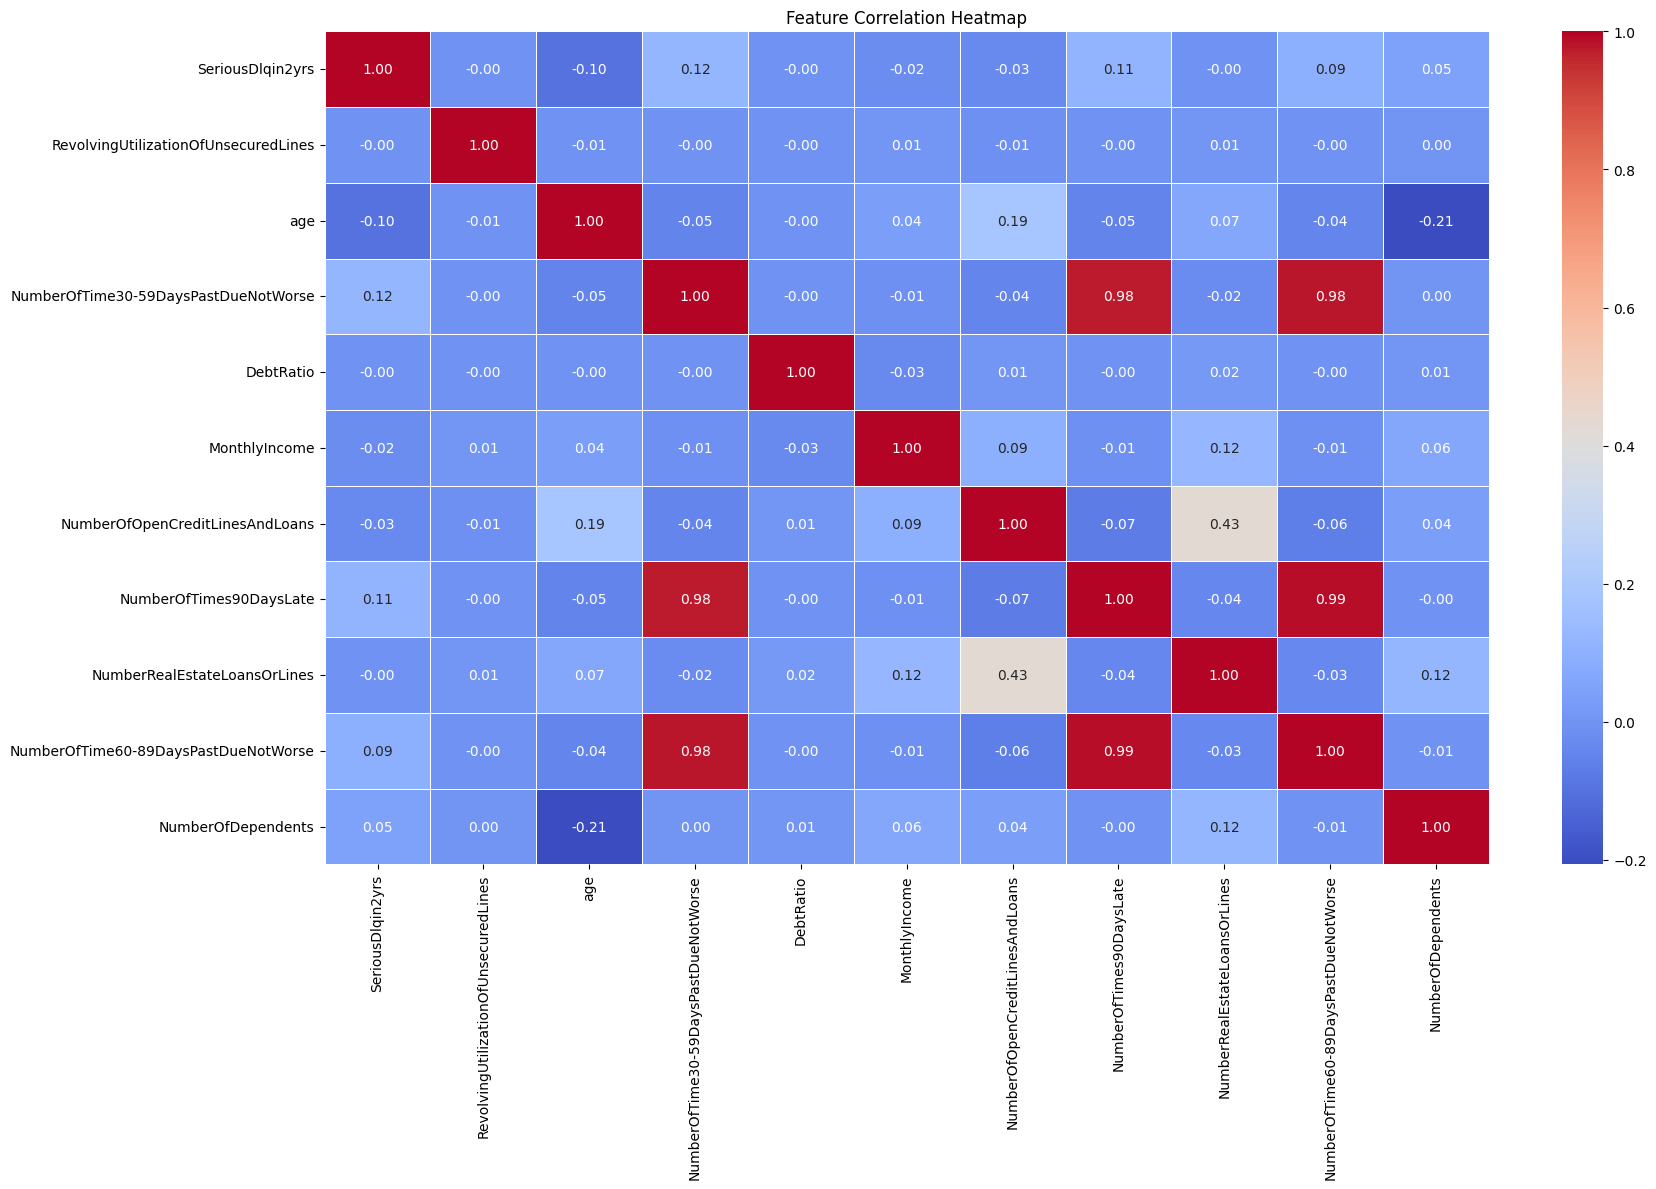

In [34]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
df['total_delinquencies'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] +df['NumberOfTime60-89DaysPastDueNotWorse'] +
    df['NumberOfTimes90DaysLate'])


In [36]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,total_delinquencies
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1


In [37]:
df['has_any_delinquency'] = df['total_delinquencies'].apply(lambda x: 1 if x > 0 else 0)

In [38]:
df['max_delinquency_duration'] = df[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate']].gt(0).dot([30, 60, 90])


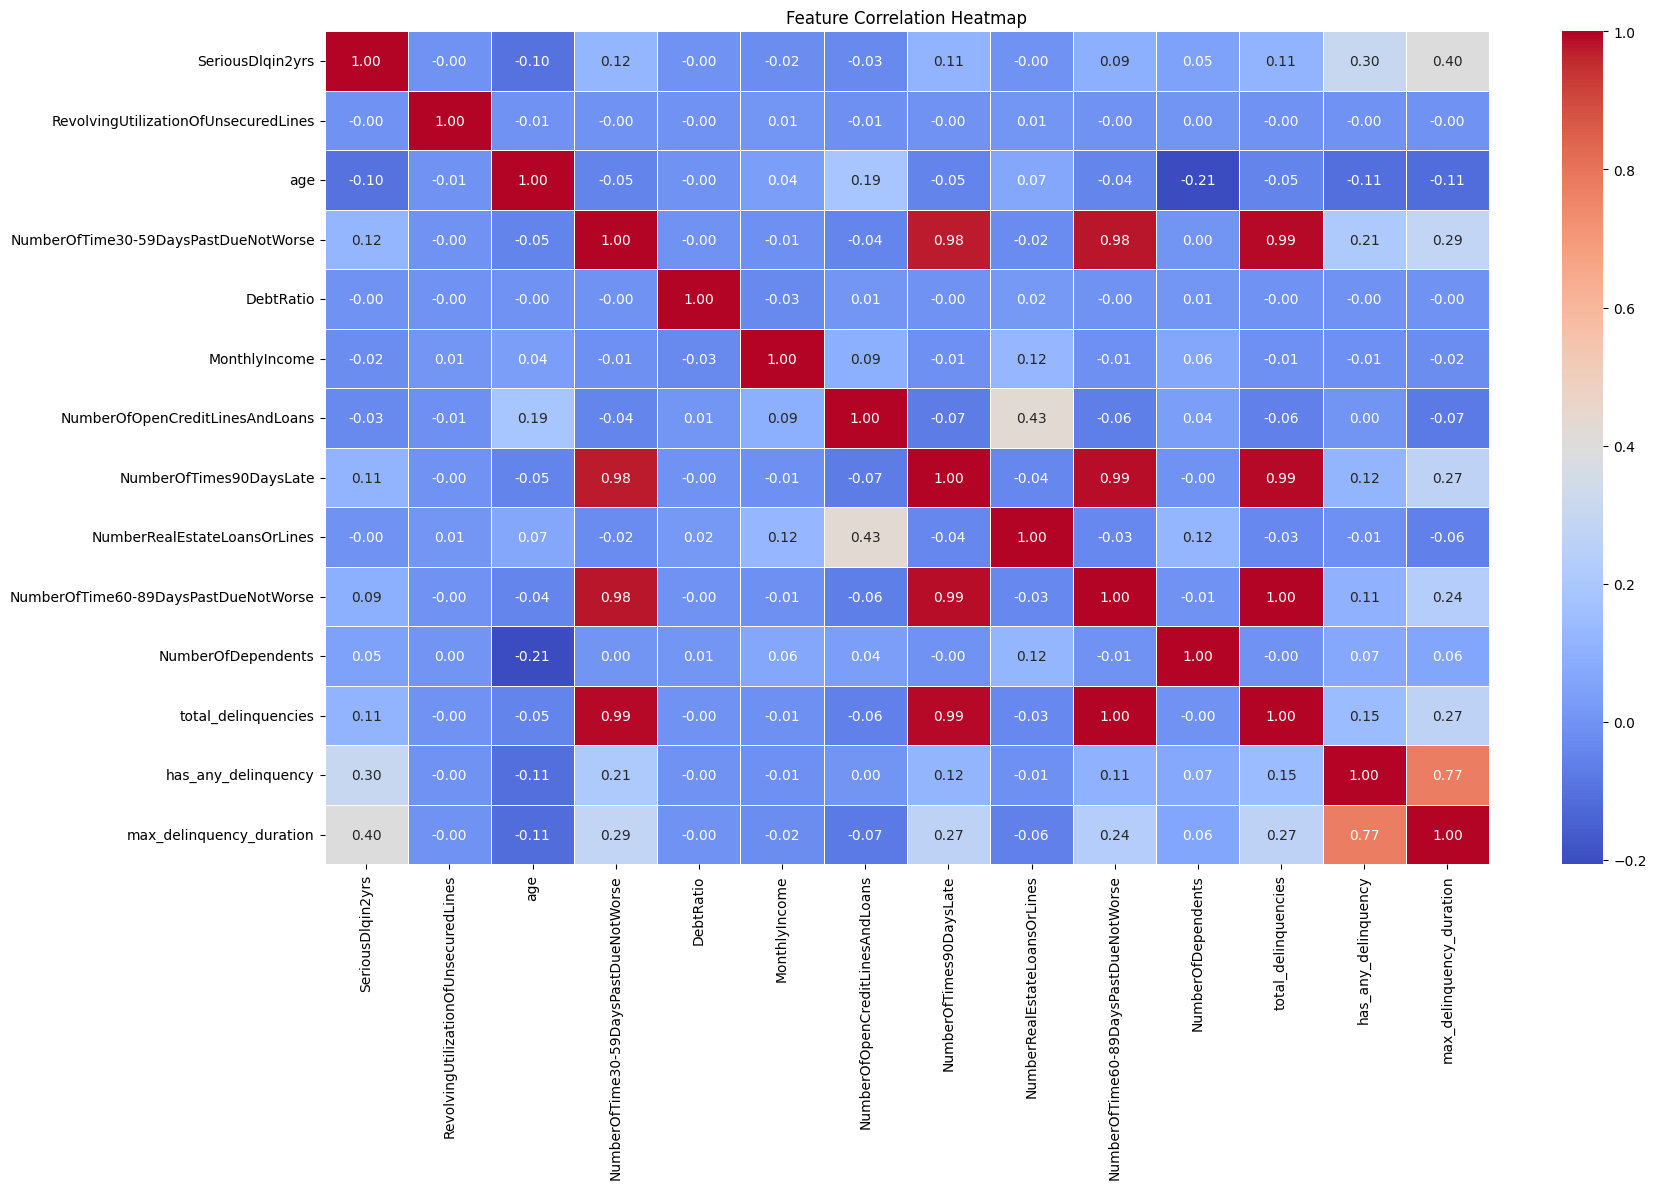

In [39]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [40]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'total_delinquencies', 'has_any_delinquency',
       'max_delinquency_duration'],
      dtype='object')

In [41]:
df.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse','NumberRealEstateLoansOrLines'], axis=1 ,inplace=True)

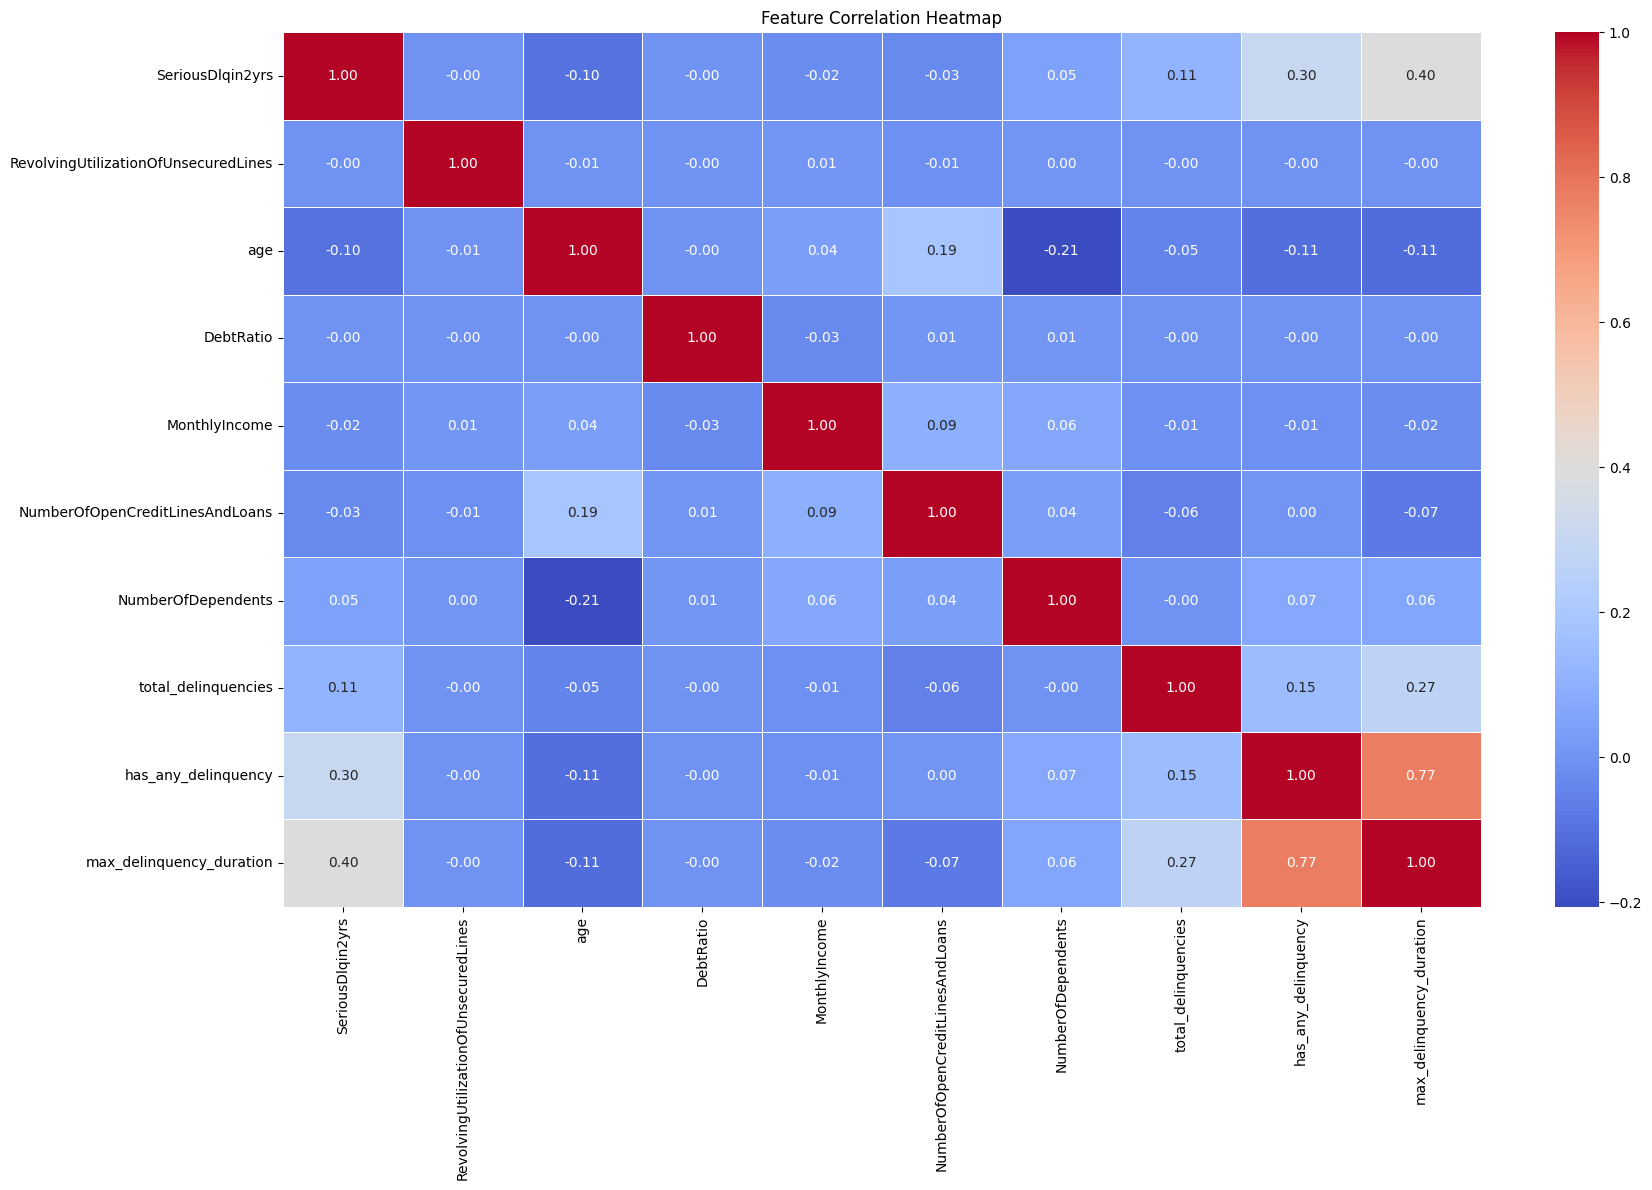

In [42]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [43]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfDependents', 'total_delinquencies', 'has_any_delinquency',
       'max_delinquency_duration'],
      dtype='object')

In [44]:
# Select features to scale
features_to_scale = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfDependents',
    'total_delinquencies',
    'has_any_delinquency',
    'max_delinquency_duration'
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [45]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents,total_delinquencies,has_any_delinquency,max_delinquency_duration
0,1,-0.019973,-0.435985,-0.060775,0.170305,0.819965,0.999810,0.117750,1.930832,0.508776
1,0,-0.019229,-0.782566,-0.062380,-0.282957,-0.919901,0.129023,-0.075524,-0.517911,-0.401180
2,0,-0.020393,-0.921199,-0.062467,-0.252229,-1.306537,-0.741765,0.117750,1.930832,3.238645
3,0,-0.022044,-1.475729,-0.062582,-0.234293,-0.726582,-0.741765,-0.075524,-0.517911,-0.401180
4,0,-0.019424,-0.158720,-0.062609,3.956851,-0.339945,-0.741765,0.021113,1.930832,0.508776
...,...,...,...,...,...,...,...,...,...,...
149994,0,-0.021452,-0.089404,-0.061715,-0.227342,-0.339945,-0.741765,-0.075524,-0.517911,-0.401180
149995,0,-0.022795,1.574187,-0.062137,-0.317716,-0.919901,-0.741765,-0.075524,-0.517911,-0.401180
149996,0,-0.021787,-0.505301,-0.060979,-0.075513,-0.919901,0.999810,-0.075524,-0.517911,-0.401180
149998,0,-0.022953,-1.475729,-0.062667,-0.066336,-0.919901,-0.741765,-0.075524,-0.517911,-0.401180


C:\Users\anshkuma\AppData\Local\Temp\ipykernel_18316\3446781530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SeriousDlqin2yrs', data=df, palette='Set2')
C:\Users\anshkuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\anshkuma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a

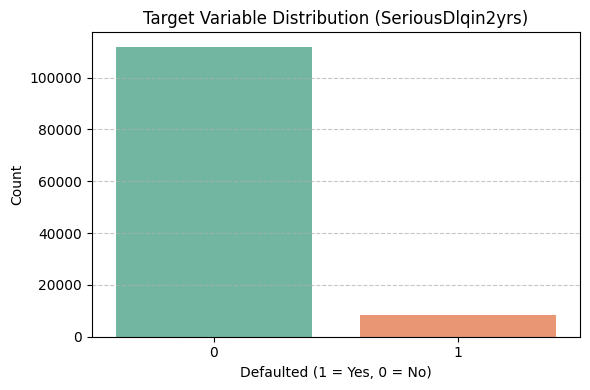

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SeriousDlqin2yrs', data=df, palette='Set2')
plt.title("Target Variable Distribution (SeriousDlqin2yrs)")
plt.xlabel("Defaulted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
# Split first
X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [49]:
# Apply SMOTE on training only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [50]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     22383
           1       0.30      0.38      0.34      1671

    accuracy                           0.90     24054
   macro avg       0.63      0.66      0.64     24054
weighted avg       0.91      0.90      0.90     24054



In [53]:
print("ROC AUC:", roc_auc_score(y_test, y_proba))

ROC AUC: 0.8044087383257892


In [54]:
# Save the trained model to file
model_path = "risk_model.pkl"
with open(model_path, "wb") as f:
    pickle.dump(model, f)

In [55]:
# Save the scaler 
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)